In [2]:
from tira.rest_api_client import Client
import pandas as pd
from tqdm import tqdm
import ir_datasets
import json

tira = Client()

TASK = 'ir-benchmarks'
TEAM = 'ows'

datasets = ['longeval-heldout-20230513-training', 'longeval-long-september-20230513-training',
            'longeval-short-july-20230513-training', 'longeval-train-20230513-training']

approaches = ['PyTerrier-Index >> BM25']

import pyterrier as pt

if not pt.started():
    # needed in the image so that pyterrier can find the shared libs
    !ln -s /usr/lib/jvm/java-11-openjdk/lib/server/libjvm.so /usr/lib/jvm/java-11-openjdk/lib/
    pt.init()

In [3]:
for dataset in datasets:
    for approach in approaches:
        tira.get_run_output(f'{TASK}/{TEAM}/{approach}', dataset)

In [21]:
dataset = pt.datasets.get_dataset('irds:longeval/train')

bm25 = pt.io.read_results(
    tira.get_run_output(f'{TASK}/{TEAM}/PyTerrier-Index >> BM25',
                        'longeval-train-20230513-training') + '/run.txt'
)

pt.Experiment(
    retr_systems = [bm25],
    names = ['BM25'],
    qrels = dataset.get_qrels(),
    topics = dataset.get_topics(),
    verbose = True,
    eval_metrics = ['map', 'P_10', 'ndcg', 'recall_1000']
)

pt.Experiment: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.65s/system]


,name,map,P_10,ndcg,recall_1000
0,BM25,0.145395,0.093452,0.288963,0.705327


We can reproduce the original scores on the validation data quite well.

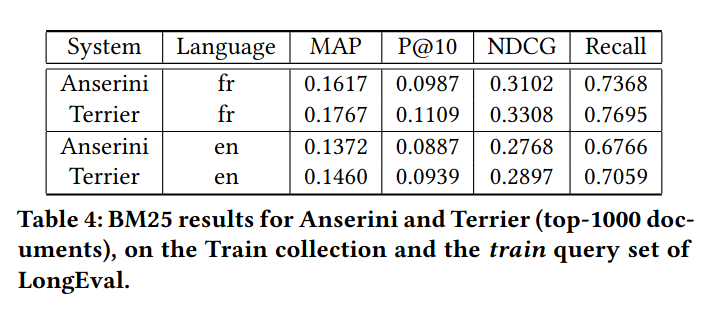